In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
data = pd.read_csv('ad_10000records.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


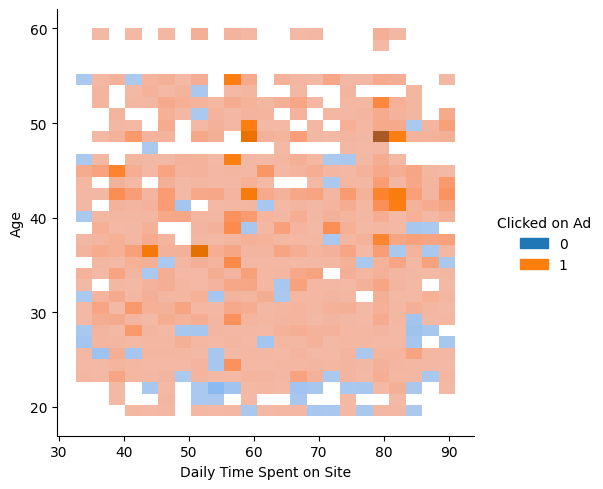

In [53]:
sns.displot(data, x='Daily Time Spent on Site', y='Age', hue='Clicked on Ad')
plt.show()

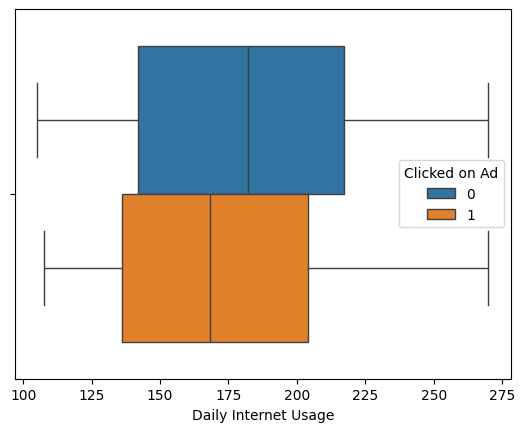

In [54]:
sns.boxplot(data, x='Daily Internet Usage', hue='Clicked on Ad')
plt.show()

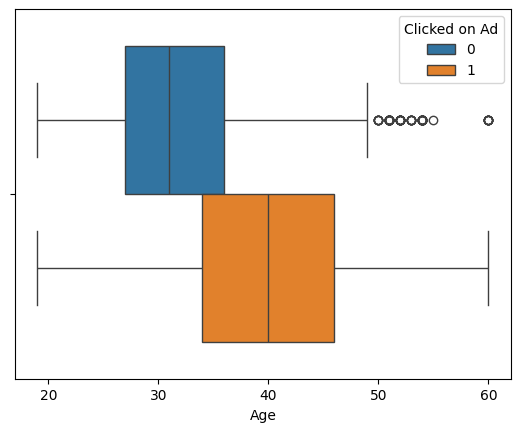

In [55]:
sns.boxplot(data, x='Age', hue='Clicked on Ad')
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
gender = pd.get_dummies(data['Gender'], drop_first=True, dtype=float)
gender.head()

,Male
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


In [58]:
data_train = pd.concat([data, gender], axis=1)
data_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Male
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0,1.0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0,1.0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0,0.0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0,0.0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1,0.0


In [59]:
data_train = data_train.drop(['Ad Topic Line', 'City', 'Gender', 'Country','Timestamp'], axis=1)
data_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Male
0,62.26,32.0,69481.85,172.83,0,1.0
1,41.73,31.0,61840.26,207.17,0,1.0
2,44.40,30.0,57877.15,172.83,0,0.0
3,59.88,28.0,56180.93,207.17,0,0.0
4,49.21,30.0,54324.73,201.58,1,0.0


In [60]:
data_train.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad', 'Male'],
      dtype='object')

In [61]:
X = data_train[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = data_train['Clicked on Ad']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
dtree = RandomForestClassifier()

In [65]:
dtree.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
pred_dtree = dtree.predict(X_test)
pred_dtree

array([1, 0, 1, ..., 1, 0, 0])

In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_dtree))

0.782


In [68]:
print("Ads Click Through Rate Prediction : ")
a = float(input("Daily Time Spent on Site: "))
b = float(input("Age: "))
c = float(input("Area Income: "))
d = float(input("Daily Internet Usage: "))
e = input("Gender (Male = 1, Female = 0) : ")

features = np.array([[a, b, c, d, e]])
print("Will the user click on ad = ", dtree.predict(features))

Ads Click Through Rate Prediction : 
Will the user click on ad =  [1]


/opt/anaconda3/envs/DataScience/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
